<a href="https://colab.research.google.com/github/Amrit1799/Cognitive-Analysis/blob/main/Cognitive(Lab4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install glmnet


**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import math
import glmnet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Reading, Preprocessing and Dividing the dataset into training & testing

In [ ]:
dataset = pd.DataFrame(pd.read_csv('Hitters.csv'))

In [ ]:
####  Taking the nan values from salary and making it the test dataset.

data = pd.read_csv("Hitters.csv", index_col ="Salary")
test = data.loc[math.nan]

In [ ]:
####  deleting the rows corresponding to null value.
train = dataset.dropna()

In [ ]:
x=train.iloc[:,0:18]
y=train.iloc[:,18]

test= test.iloc[:,0:18]

In [ ]:
features_to_encode = ['League','Division']

# Convert categorical variables into one hot encoding

for col in features_to_encode:
    x[col] = x[col].astype('category')
    test[col] = test[col].astype('category')
x = pd.get_dummies(data = x, columns = features_to_encode)
test = pd.get_dummies(data = test, columns = features_to_encode)

Scatter plot between a x attribute and y


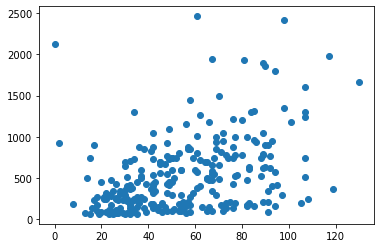

In [ ]:
plt.scatter(x['Runs'], y)

Defining and Predicting Ridge Regression


In [ ]:
rr = Ridge(alpha=20)
rr.fit(x, y)
w = rr.coef_

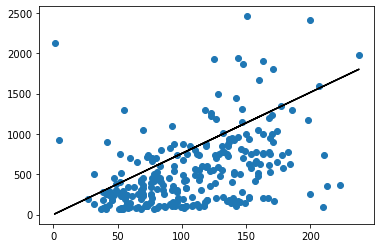

In [ ]:
plt.scatter(x['Hits'], y)
plt.plot(x['Hits'], w[1]*x['Hits'], c='black')

In [ ]:
rr.score(x,y)

0.545589889639576

In [ ]:
##### calculating the score and rms value.


y1 = rr.predict(x)
print('RMS Error')
print(np.sqrt(mean_squared_error(y,y1)))
print('R2 Score')
print(r2_score(y,y1))

RMS Error
303.52018322030005
R2 Score
0.545589889639576


In [ ]:
########   Final Predicted Salary

y_predicted = rr.predict(test)
y_predicted

array([ 144.61296733,   29.57972785,  716.00932857,  300.80424054,
        599.71991952, 1207.94042708,  242.87257949,  805.44323216,
        158.54080071,  338.36004699,  371.68040213,  294.93883837,
       1374.71512766,  159.68832466,  424.25080732,   63.7513433 ,
        225.06768846,  548.04833489,  402.93707224,  351.43125947,
        763.95754764,   89.09933322,  341.37578859,  677.05950147,
        421.80409352,  553.92358041, 1141.95860397,  132.15378306,
        161.96843947, 1043.90551686,  464.39040206,  221.09116501,
        303.33861991,  168.66836416,  252.58611496,  543.94169927,
         96.14142312,  330.73036653,  283.51607453,  248.45006831,
        194.44296066,  618.04683601,  283.5578752 ,  416.73771659,
        283.87281301,  416.35999236,  330.63864356,  974.25966911,
        636.97308808,  110.05185017,  107.03968352,  340.67819926,
        222.01958632,  174.24355313,  568.93714964,  179.20010727,
       1256.1328408 , 1082.20095142,  312.55272085])

**LASSO**

In [ ]:
model_lasso = Lasso(alpha=20)
model_lasso.fit(x, y) 
y_train_lasso= model_lasso.predict(x)
print('RMS Error')
print(np.sqrt(mean_squared_error(y,y_train_lasso)))
print('R2 Score')
print(r2_score(y,y_train_lasso))


RMS Error
307.1445818318507
R2 Score
0.5346726799553602


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8506062.60824124, tolerance: 5331.911278864536
  positive)


Predicting Salary using Lasso

In [ ]:
pred_y_lasso= model_lasso.predict(test)
pred_y_lasso

array([ 157.82721784,   77.01301482,  794.67005192,  374.402732  ,
        667.54869151, 1216.61774379,  224.76891985,  797.58496273,
        178.16869096,  344.90652107,  366.1566231 ,  274.66030347,
       1352.99294242,  140.79174256,  424.69301631,  107.01369425,
        165.14871739,  520.46519799,  332.10221883,  304.4351544 ,
        794.88513178,  125.11236836,  349.84447128,  678.34538914,
        405.79791111,  536.84448125, 1121.10277833,  110.74779594,
        152.64525209,  982.61884474,  490.64450694,  203.16213563,
        357.19900525,  236.84716204,  210.7575896 ,  583.65271679,
        160.08196155,  264.82338539,  258.40173075,  294.41193377,
        146.61619939,  680.90196968,  219.38190886,  356.10807559,
        343.1018388 ,  408.56623814,  332.42660934, 1022.15432957,
        612.69825575,  158.05128527,  107.99187677,  402.98704903,
        233.90009031,  162.05693222,  642.47334067,  170.87944497,
       1282.35815292, 1033.37426004,  274.42409685])